<a href="https://colab.research.google.com/github/svhenrique/preditor-faturamento/blob/main/testGeofusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio Técnico Estagiário em Machine Learning** 


* O dataset contém 23 recursos quer podem ser usados para a previsão de faturamento em novos bairros.
* Problema de regressão para previsão de faturamento.

### **Case**



Um cliente da Geofusion que atua no setor alimentício na cidade do Rio de Janeiro gostaria de entender melhor sobre o seu público alvo. Dadas as variáveis sociodemográficas (presentes no dicionário de dados) e a variável de performance **faturamento**, realize uma análise exploratória trazendo os insights sobre o público alvo da rede e crie um modelo de regressão capaz de prever o faturamento em novos bairros, caso o nosso cliente queira realizar um projeto de expansão.

### **Dicionário de dados**

codigo: Código do bairro

nome: Nome do bairro

cidade: Cidade

estado: Estado 

população: População total 

popAte9: População - até 9 anos 

popDe10a14: População - de 10 a 14 anos

popDe15a19: População - de 15 a 19 anos

popDe20a24: População - de 20 a 24 anos

popDe25a34: População - de 25 a 34 anos

popDe35a49: População - de 35 a 49 anos

popDe50a59: População - de 50 a 59 anos

popMaisDe60: População - 60 anos ou mais

domiciliosA1: Quantidade de Domicílios de Renda A1 

domiciliosA2: Quantidade de Domicílios de Renda A2

domiciliosB1: Quantidade de Domicílios de Renda B1

domiciliosB2: Quantidade de Domicílios de Renda B2

domiciliosC1: Quantidade de Domicílios de Renda C1

domiciliosC2: Quantidade de Domicílios de Renda C2

domiciliosD: Quantidade de Domicílios de Renda D

domiciliosE: Quantidade de Domicílios de Renda E

rendaMedia: Renda Média por Domicílio

faturamento: Faturamento Total no Bairro

Explicação dos tipos de Renda em domicílios: Basicamente A1 tem mais renda e E tem menos renda.

Fontes:

https://www.questionpro.com/blog/pt-br/pesquisa-criterio-brasil/

## Importando bibliotecas necessárias

In [ ]:
# montando drive (para o colab)
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# importando bibliotecas necessárias
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Lendo dados

In [ ]:
# dados em pasta 
pasta = '/content/drive/My Drive/datasets/geofusion/'

In [ ]:
# lendo dados
dados = pd.read_csv(pasta + 'DesafioEstagioMachineLearning.csv')
dados

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3304557062,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,3304557093,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,3304557091,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,3304557065,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,921875.0


## Limpeza e organização dos dados

Essa parte é caracterizada pela identificação e tratamento de dados nan (dados faltantes) ou corruptos e pela remoção de features que são, perceptivelmente, inúteis (podendo até mesmo dificultar o aprendizado) para os algoritmos de Machine Learning.

In [ ]:
# mostrando se existem valores nan nos dados
dados.isna().any()

codigo          False
nome            False
cidade          False
estado          False
população       False
popAte9         False
popDe10a14      False
popDe15a19      False
popDe20a24      False
popDe25a34      False
popDe35a49      False
popDe50a59      False
popMaisDe60     False
domiciliosA1    False
domiciliosA2    False
domiciliosB1    False
domiciliosB2    False
domiciliosC1    False
domiciliosC2    False
domiciliosD     False
domiciliosE     False
rendaMedia       True
faturamento     False
dtype: bool

A feature "rendaMedia" possue valores nan e deve ser tratada.

In [ ]:
# mostrando quais instâncias de rendaMedia possui valores nan

dados['rendaMedia'][dados['rendaMedia'].isna() == True]

6     NaN
26    NaN
52    NaN
71    NaN
89    NaN
122   NaN
Name: rendaMedia, dtype: float64

Como existem apenas 6 instâncias com valoers nan, elas serão removidas.

In [ ]:
# mostrando instâncias que estão com valores nan

dados = dados.drop(dados['rendaMedia'][dados['rendaMedia'].isna() == True].index)
dados.isna().any()

codigo          False
nome            False
cidade          False
estado          False
população       False
popAte9         False
popDe10a14      False
popDe15a19      False
popDe20a24      False
popDe25a34      False
popDe35a49      False
popDe50a59      False
popMaisDe60     False
domiciliosA1    False
domiciliosA2    False
domiciliosB1    False
domiciliosB2    False
domiciliosC1    False
domiciliosC2    False
domiciliosD     False
domiciliosE     False
rendaMedia      False
faturamento     False
dtype: bool

In [ ]:
# mostrando os valores possíveis em estado
dados.estado.unique()

array(['RJ'], dtype=object)

In [ ]:
# mostrando os valores possíveis em cidade
dados.cidade.unique()

array(['Rio de Janeiro'], dtype=object)

Como as features estado e cidade assumem um único valor, elas não precisarão de análise de dados e não servirão para os algoritmos de Machine Learning. Portanto, as features cidade e estado serão removidas.

In [ ]:
# removendo colunas cidade e estado
dados = dados.drop(columns=['cidade','estado'])
dados.head()

,codigo,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0


As features codigo e nome, apesar de serem úteis para a análise de dados, tendo em vista os seus vários valores e portanto a possibilidade de investigação sobre seus padrões e afins, elas não serão úteis para a criação dos modelos de Machine Learning e portante serão removidas na criação dos modelos.

As features codigo e nome não são úteis para os algoritmos de Machine Learning pois elas representam a indentificação dos bairros, sendo que o importante são as características da localidade (como a população, renda média, etc).

## Analisando dados

Essa parte é exclusiva para a ánalise dos dados. A análise de dados é caracterizada pela descoberta de informações como padrões, comportamento incomum em features, problemas nos dados (como valores nan ou dados incorretos), comportamentos que só são entendíveis com pesquisa sobre o objeto real representado pelos dados, etc.

Todas esssas coisas podem afetar o modelo de previsão que será construído e portanto devem ser analisadas e moldadas com cautela.

### Análise preliminar dos dados

In [ ]:
# vendo análise geral dos dados
dados.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,3.304557e+09,43077.435065,5403.279221,2518.837662,3311.116883,3386.681818,6650.331169,8901.909091,5374.831169,7530.448052,391.974026,596.623377,1856.525974,2395.954545,3586.155844,3072.181818,577.058442,1856.772727,3608.071429,8.701803e+05
std,4.596755e+01,65336.035109,11008.972231,5037.002622,5851.900968,5698.898125,9196.873495,11710.858917,8118.995209,10425.899252,1429.321101,1552.853995,3004.463147,2817.055628,4391.463785,4065.856812,837.320073,2327.010887,6091.865305,4.430037e+05
min,3.304557e+09,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,2.000000,654.000000,2.465100e+04
25%,3.304557e+09,13443.250000,1512.250000,678.250000,945.000000,988.500000,2151.500000,2910.250000,1630.750000,2114.750000,0.000000,0.000000,393.000000,728.000000,1080.250000,774.750000,117.250000,430.500000,1486.000000,7.051840e+05
50%,3.304557e+09,26567.000000,3150.000000,1450.500000,2034.000000,2183.500000,4288.500000,5675.000000,3337.500000,4536.500000,0.000000,104.000000,833.500000,1497.000000,2458.000000,1883.500000,330.000000,1051.500000,1915.500000,8.220250e+05
75%,3.304557e+09,46557.500000,5650.750000,2648.500000,3450.250000,3435.750000,7143.500000,9596.250000,6333.750000,9282.000000,0.000000,351.750000,1909.000000,3079.250000,4261.000000,3627.250000,696.000000,2267.250000,2954.500000,9.325952e+05
max,3.304557e+09,667603.000000,122578.000000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.000000,14833.000000,63887.000000,2.915612e+06


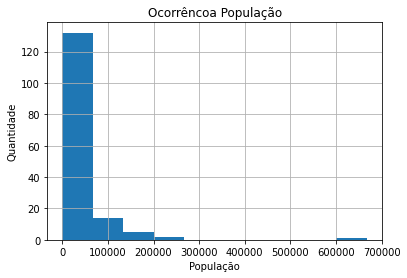

In [ ]:
# plotando ocorrência da população
plt.hist(dados.população)
plt.xlabel('População')
plt.ylabel('Quantidade')
plt.title('Ocorrêncoa População')
plt.grid(True)
plt.show()

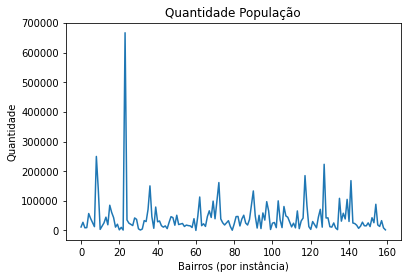

In [ ]:
# plotando a quantidade de pessoas em população por bairro
plt.plot(dados.população)
plt.xlabel('Bairros (por instância)')
plt.ylabel('Quantidade')
plt.title('Quantidade População')
plt.show()

Com o gráfico anterior é possível concluir que existe um bairro, ou bairros, que possuem bem mais pessoas que os outros bairros no dataframe.

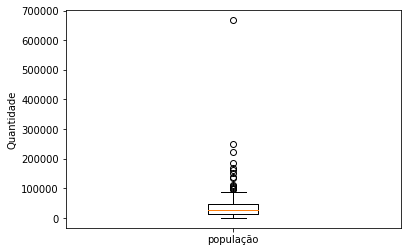

In [ ]:
# boxplot da feature população
plt.boxplot(dados['população'], labels=['população'])
plt.ylabel('Quantidade')
plt.show()

É possível observar com os gráficos anteriores que a coluna "população" possui alguns outliers. 

Outliers podem atrapalhar o aprendizado dos modelos de Machine Learning, por isso, geralmente, é recomendado usar estratégias para o tratamento de outliers.

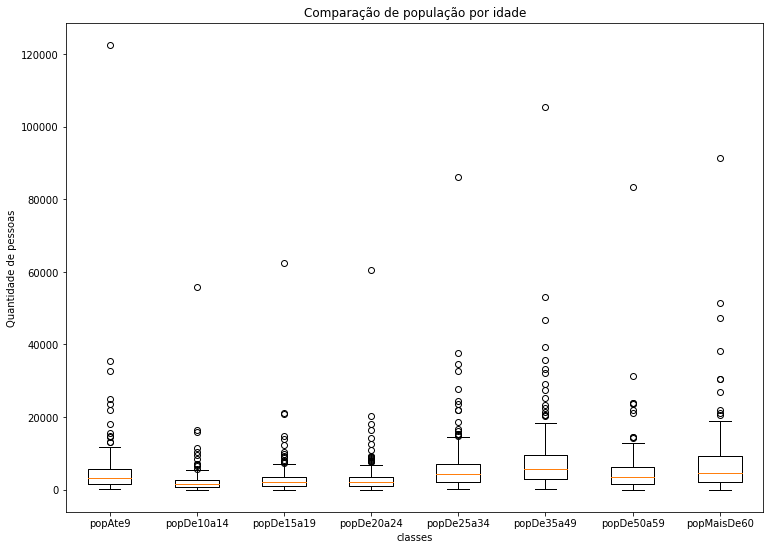

In [ ]:
# boxplot comparando as idades de população

# É possível comparar todos juntos pois eles representam a mesma "ideia" e tem a escala parecida
# isso facilita a vizualização dos dados.

labels = ['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']
plt.figure(figsize=(12.5,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.boxplot([dados['popAte9'], dados['popDe10a14'], dados['popDe15a19'], dados['popDe20a24'], 
            dados['popDe25a34'], dados['popDe35a49'], dados['popDe50a59'], dados['popMaisDe60']], labels=labels)
plt.title('Comparação de população por idade')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('classes')
plt.show()

del labels # removendo variável labels para não atrapalhar no futuro

Todas as features que representam as idades das diversas populações estão com outliers, pra isso penso nas seguintes hipoteses:



*   Existe um bairro com bem mais gente do que os outros bairros (pode ser caracterizado pelo outlier identificado na feature de população anteriormente), aumentando o valor das features de idade e criando os outliers.
*   Bairros com maior concentração de pessoas de certa idade, por exemplo, algum bairro com mais gente de 50 a 59 anos. Logo, vários bairros criam vários outliers para as diversas features de idade.



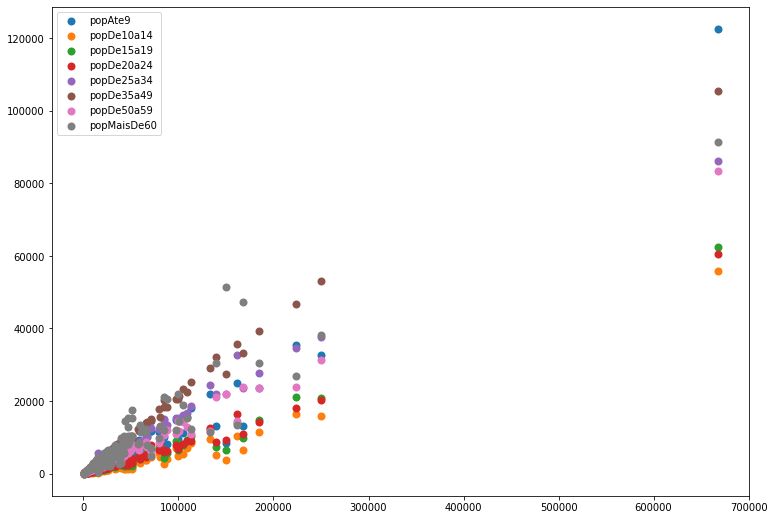

In [ ]:
# plotando comparação dos atributos de idade com o atributo população

colunas = ['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']

plt.figure(figsize=(12.5,9)) 
for coluna in colunas:
  plt.scatter(dados['população'],dados[coluna],label=coluna, linewidths=2)
plt.legend()
plt.show()

In [ ]:
# mostrando índice de correlação entre a feature de população e as features de idade da população
dados.corr()['população'].loc[['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']]

popAte9        0.970970
popDe10a14     0.972225
popDe15a19     0.985341
popDe20a24     0.990407
popDe25a34     0.989337
popDe35a49     0.986662
popDe50a59     0.991253
popMaisDe60    0.924405
Name: população, dtype: float64

Com o índice e gráfico de correlação anteriores provavelmente a hipotese 1 tem um peso maior (não desconsiderando a hipotese 2), pois, como eles tem uma correlação positiva forte, quanto maior a população mais as features de idade irão aumentar. Logo, provavelmente os outliers que existem em "população" sejam a causa de grande parte dos outros outliers citados.

In [ ]:
# gráfico com features ordenadas do mior para o menor de acordo com população
dados.sort_values('população', ascending=False)

,codigo,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
23,3304557102,Campo Grande,667603,122578,55935,62342,60567,86116,105316,83341,91408,0,1389,11747,21237,33111,25779,4956,12944,1856.0,69645.0
8,3304557099,Bangu,249987,32651,15949,20926,20146,37750,53090,31246,38229,0,496,5246,13274,24363,22447,4564,11109,1550.0,35465.0
127,3304557107,Santa Cruz,223440,35572,16403,20998,18090,34697,46774,23878,27028,0,0,2057,8310,18161,22160,4572,14833,1188.0,43346.0
117,3304557097,Realengo,185206,23513,11337,14883,14252,27747,39378,23702,30394,0,242,4551,11214,18442,16361,3661,8364,1576.0,89769.0
141,3304557030,Tijuca,168267,13033,6405,9750,10968,23657,33313,23892,47249,4351,8306,19076,11631,10755,6539,1280,3723,7844.0,2157079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,3304557132,Camorim,2025,282,120,155,175,460,452,207,174,4,52,144,104,132,132,35,92,2929.0,876113.0
31,3304557123,Cidade Universitária,1442,181,112,143,124,202,374,151,155,0,3,45,146,159,64,8,23,1934.0,855182.0
22,3304557094,Campo Dos Afonsos,1403,208,125,166,103,125,570,72,34,0,114,168,88,24,3,0,2,5876.0,935061.0
79,3304557129,Joá,842,61,29,35,46,131,192,132,216,79,59,57,33,7,8,0,20,17659.0,1162364.0


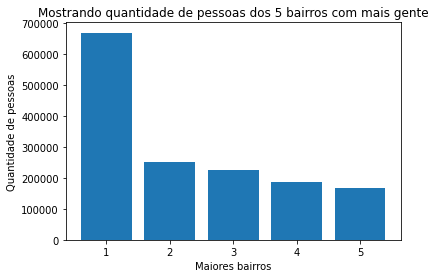

In [ ]:
# gráfico de barras para mostrar os 5 bairros com mais gente
instancias_populacao = [dados.sort_values('população', ascending=False).iloc[x]['população'] for x in range(5)]

plt.bar(list(range(1, 6)), instancias_populacao)
plt.xlabel('Maiores bairros')
plt.ylabel('Quantidade de pessoas')
plt.title('Mostrando quantidade de pessoas dos 5 bairros com mais gente')
plt.show()

del instancias_populacao

In [ ]:
# retirando maior outlier em população para testes
populacao_sem_maior = dados.sort_values('população', ascending=False).iloc[1:]
populacao_sem_maior

,codigo,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
8,3304557099,Bangu,249987,32651,15949,20926,20146,37750,53090,31246,38229,0,496,5246,13274,24363,22447,4564,11109,1550.0,35465.0
127,3304557107,Santa Cruz,223440,35572,16403,20998,18090,34697,46774,23878,27028,0,0,2057,8310,18161,22160,4572,14833,1188.0,43346.0
117,3304557097,Realengo,185206,23513,11337,14883,14252,27747,39378,23702,30394,0,242,4551,11214,18442,16361,3661,8364,1576.0,89769.0
141,3304557030,Tijuca,168267,13033,6405,9750,10968,23657,33313,23892,47249,4351,8306,19076,11631,10755,6539,1280,3723,7844.0,2157079.0
72,3304557081,Jacarepaguá,161748,24961,10376,13874,16321,32572,35693,14500,13451,422,1244,3405,7984,17034,15909,3178,6837,2160.0,94671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,3304557132,Camorim,2025,282,120,155,175,460,452,207,174,4,52,144,104,132,132,35,92,2929.0,876113.0
31,3304557123,Cidade Universitária,1442,181,112,143,124,202,374,151,155,0,3,45,146,159,64,8,23,1934.0,855182.0
22,3304557094,Campo Dos Afonsos,1403,208,125,166,103,125,570,72,34,0,114,168,88,24,3,0,2,5876.0,935061.0
79,3304557129,Joá,842,61,29,35,46,131,192,132,216,79,59,57,33,7,8,0,20,17659.0,1162364.0


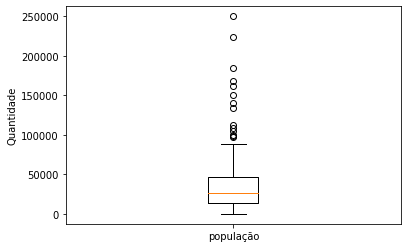

In [ ]:
# boxplot da feature população (sem o bairro com mais gente)

plt.boxplot(populacao_sem_maior['população'], labels=['população'])
plt.ylabel('Quantidade')
plt.show()

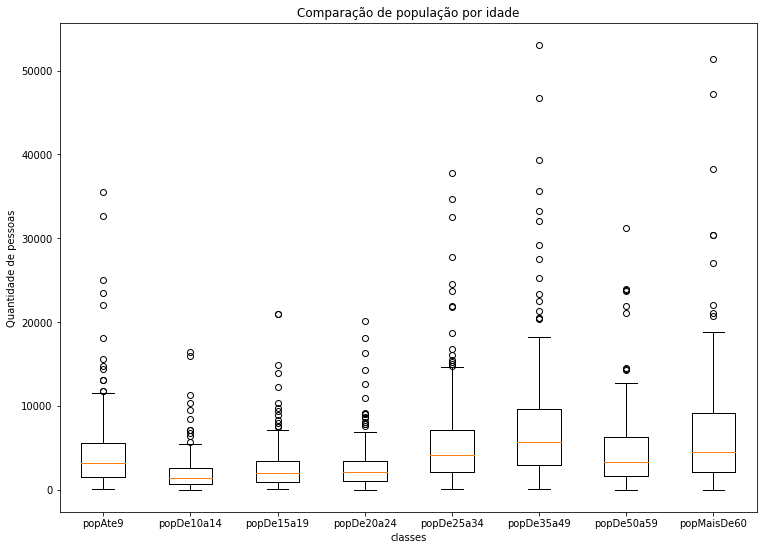

In [ ]:
# boxplot comparando as idades de população (sem o bairro com mais gente)

labels = ['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']
plt.figure(figsize=(12.5,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.boxplot([populacao_sem_maior['popAte9'], populacao_sem_maior['popDe10a14'], populacao_sem_maior['popDe15a19'], populacao_sem_maior['popDe20a24'], 
            populacao_sem_maior['popDe25a34'], populacao_sem_maior['popDe35a49'], populacao_sem_maior['popDe50a59'], populacao_sem_maior['popMaisDe60']], labels=labels)
plt.title('Comparação de população por idade')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('classes')
plt.show()

Se compararmos os dois boxplot sem o maior outlier da população com os dois boxplot com o maior outlier da população, é possível ver que o pico dos valores diminuiu bastante, na comparação entre as idades foi de 15 mil para 5 mil, ganhando ainda mais peso para a hipotese 1. Entretanto, ainda existem outliers. 


**Estratégia para lidar com os outliers das features relacionadas a população**

Como o objetivo da análise é a construção de um modelo de regressão capaz de prever a feature faturamento, os outliers não serão removidos. Essa abordage se dá ao fato do significado das features. Elas terem outliers são caracterísictas do ambiente analisado, logo, é necessário que o modelo lide com esse tipo de instância.


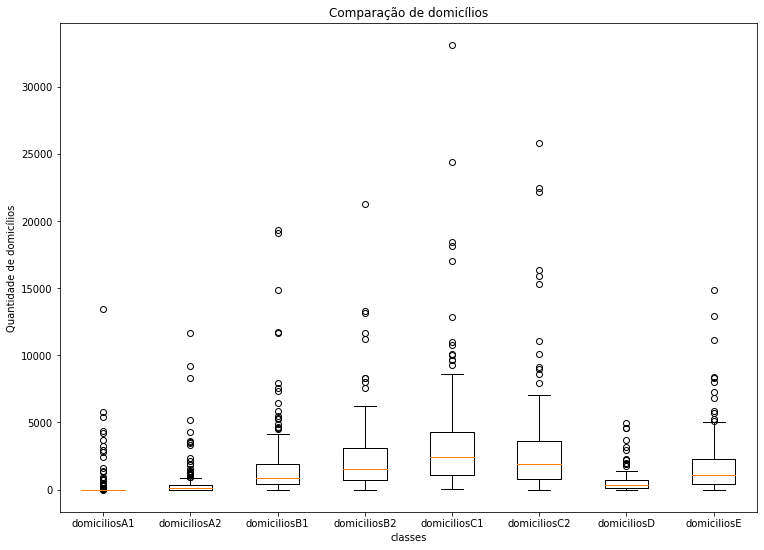

In [ ]:
# boxplot comparando a quantidade de domicílios por classe
	 	 	 	 	
labels = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']
plt.figure(figsize=(12.5,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.boxplot([dados[labels[0]], dados[labels[1]], dados[labels[2]], dados[labels[3]], 
            dados[labels[4]], dados[labels[5]], dados[labels[6]], dados[labels[7]]], labels=labels)
plt.title('Comparação de domicílios')
plt.ylabel('Quantidade de domicílios')
plt.xlabel('classes')
plt.show()

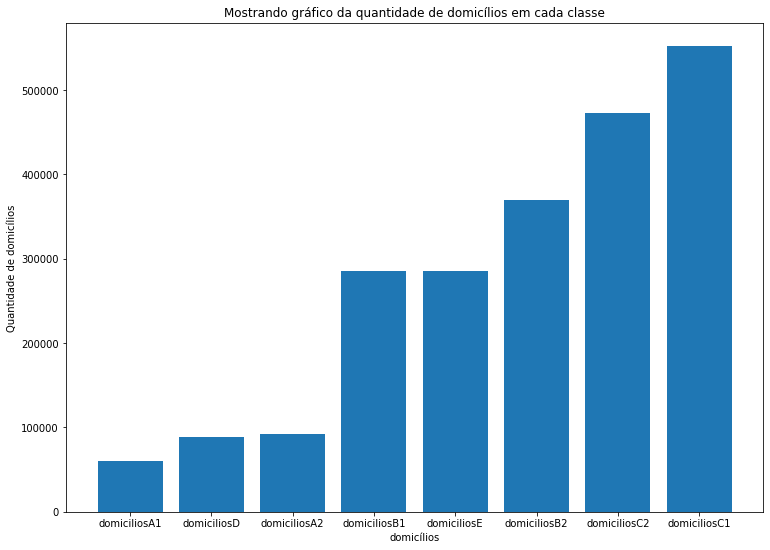

In [ ]:
# gráfico da barras mostrando quantidade de domicílios

colunas = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']

somas = [sum(dados[coluna].values) for coluna in colunas]
somas = pd.Series(somas)
somas.index = colunas
somas = somas.sort_values()

plt.figure(figsize=(12.5,9)) 
plt.bar(somas.index, somas.values)
plt.xlabel('domicílios')
plt.ylabel('Quantidade de domicílios')
plt.title('Mostrando gráfico da quantidade de domicílios em cada classe')
plt.show()

A ordem das classes de rendas em domicílios, segundo os dois gráficos anteriores são (escala descendente):

1.   C1
2.   C2
3.   B2
4.   B1
5.   E
6.   A2
7.   D
8.   A1

Estudo sobre como essas features afetam a renda média e faturamento devem ser feitos.

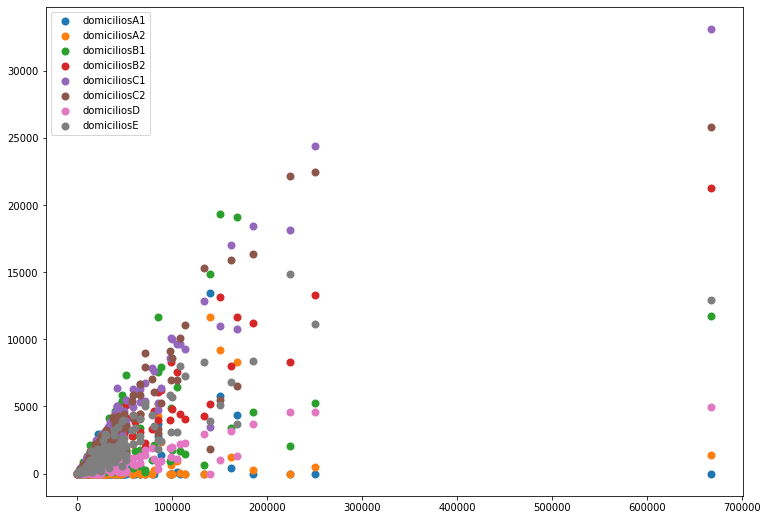

In [ ]:
# plotando comparação dos atributos dos domicílios com o atributo população

colunas = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']

plt.figure(figsize=(12.5,9)) 
for coluna in colunas:
  plt.scatter(dados['população'],dados[coluna],label=coluna, linewidths=2)
plt.legend()
plt.show()

In [ ]:
# mostrando índice de correlação entre a feature de população e as features de domicílios
dados.corr()['população'].loc[['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']]

domiciliosA1    0.185050
domiciliosA2    0.292196
domiciliosB1    0.565363
domiciliosB2    0.905439
domiciliosC1    0.928215
domiciliosC2    0.861135
domiciliosD     0.832294
domiciliosE     0.823415
Name: população, dtype: float64

Os outliers aqui tem algumas características.

*   As classes A1, A2 e B1 tem um índice de correlação positiva fraca. Não necessariamente quanto mais gente, mais domicílios de classe alta (A1, A2, B1) existirão.
*   A observação anterior não se aplica a domicílios B2, C1, C2, D e E. Esses domicílios tem uma correlação positiva forte com o número de pessoas na feature população.
*   Os bairros com mais pessoas possivelmente terão mais classes B2, C1, C2, D e E em comparação com as classes A1, A2 e B1.
*   Provavelmente o motivo das classes de renda mais altas terem um coeficiente de correlação mais baixo com a população se deve ao fato da desigualdde econômica.
*   Estudo de como esses fatores afetam a renda média e o faturamento serão feitos.



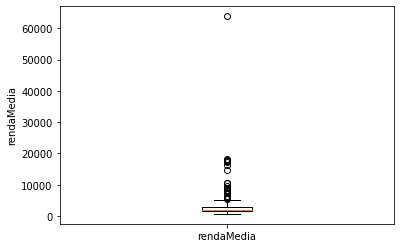

In [ ]:
# boxplot da feature de renda média

plt.boxplot(dados['rendaMedia'].values, labels=['rendaMedia'])
plt.ylabel('rendaMedia')
plt.show()

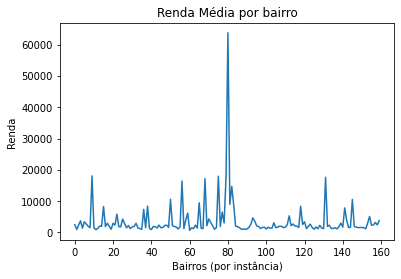

In [ ]:
# plotando renda média  por bairro
plt.plot(dados.rendaMedia)
plt.xlabel('Bairros (por instância)')
plt.ylabel('Renda')
plt.title('Renda Média por bairro')
plt.show()

Hipoteses para os outliers de renda média:

*   Esses outliers são o reflexo da desigualdade econômica, mostrando alguns bairros com domicílios de classe A1, A2 e B1 e com uma renda média mais alta.
*   Existem bairros com uma quantidade baixa de pessoas e uma quantidade alta de domicílios com classe A1, A2 e B1. Se a concentração de renda for grande e o número de pessoas for pequeno a renda média será alta.



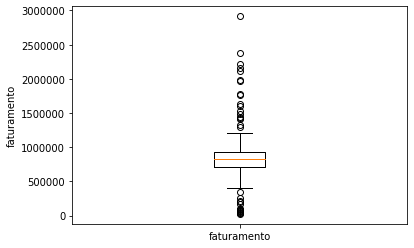

In [ ]:
# boxplot da feature de faturamento

plt.boxplot(dados['faturamento'].values, labels=['faturamento'])
plt.ylabel('faturamento')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

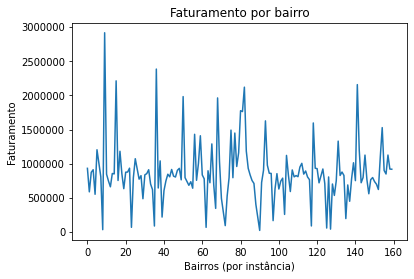

In [ ]:
# plotando faturamento  por bairro

plt.plot(dados.faturamento)
plt.xlabel('Bairros (por instância)')
plt.ylabel('Faturamento')
plt.title('Faturamento por bairro')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

A feature de faturamento está bem dispersa, mas não tem nenhuma característica notória e importante, segundo os gráficos.

### Análise de correlação

A parte de análise de correlação tenta entender a relação estatística entre duas variáveis, como uma variável se comporta quando a outra varia. É importante pois a correlação mostra quanto de uma variável pode ser usada para explicar a outra. 

Lembrando: Correlação não implica causalidade.



Critérios: Irei utilizar os critérios abaixo para a análise de correlação. Seja x o coeficiente de correlação entre duas features:

*   Correlação fraca:
    *   -3 < x < 3  sendo que x != 0
*   Correlação moderada:
    *  -7 < x <= -3 ou 3 <= x < 7
*   Correlação forte:
    *   x <= -7 ou x >= 7

<AxesSubplot:>

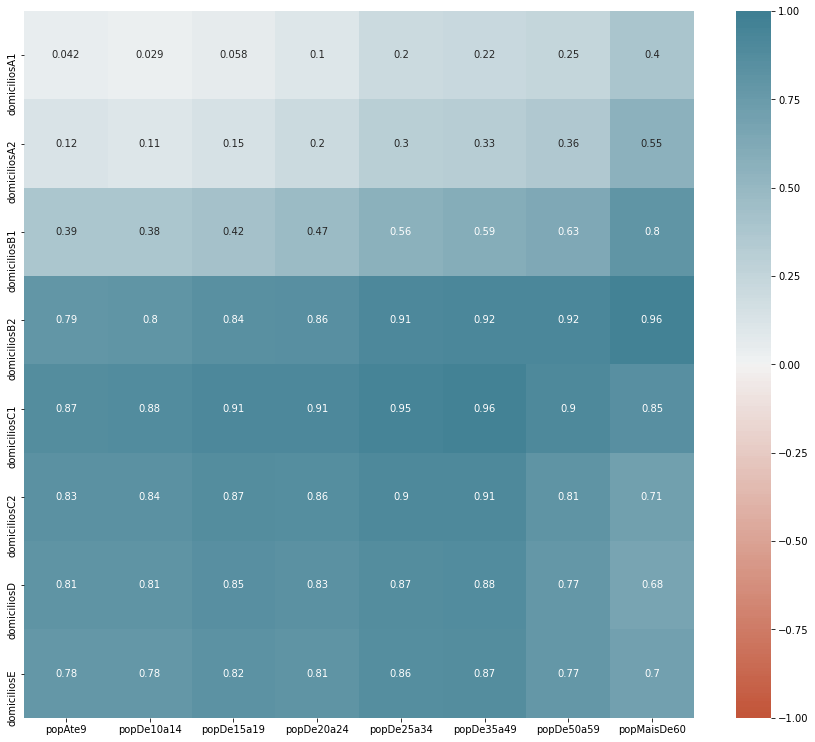

In [ ]:
# plotando coeficientes de correlação em um mapa de calor das features de idade com as de domicílio
# Ele mostra, também, o coeficiente de correlação dentro das células do mapa

correlacoes = dados.corr()[['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']].loc[['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']]
plt.figure(figsize=(15, 13))
sns.heatmap(correlacoes,vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))

Observações do mapa de calor:

*   Não existem correlações negativas entre features.
*   Existem algumas correlações positívas fortes entre features.

Observações de correlações positivas do mapa de calor:

*   domiciliosE tem uma correlação positiva forte (a partir de 0.7) com todas as features de idade.
*   domiciliosD tem uma correlação positiva forte (a partir de 0.68) com todas as features de idade.
*   domiciliosC2 tem uma correlação positiva forte (a partir de 0.71) com todas as features de idade.
*   domiciliosC1 tem uma correlação positiva forte (a partir de 0.85) com todas as features de idade.
*   domiciliosB2 tem uma correlação positiva forte (a partir de 0.79) com todas as features de idade.
*   domiciliosB1:
    *   De popate9 até popDe10a14 correlação positiva fraca.
    *   De popDe15a19 até popDe50a59 correlação positiva moderada.
    *   popMaiDe60 tem correlação positiva forte.
*   domiciliosA1:
    *   De popate9 até popDe20a24 correlação positiva fraca.
    *   A partir de popDe25a34 correlação positiva moderada.
*   domiciliosB1:
    *   De popate9 até popDe50a59 correlação positiva fraca.
    *   popMaiDe60 tem correlação positiva moderada.





Conclusões mapa de calor:



*   As classes de domicílio A1, A2 e B1 tem uma correlação positiva geral mais baixa que as outras classes. Porém, quanto mais velha é a população, o coeficiente de correlação cresce.
    * A relação entre a idade e os domicílios A1, A2 e B1, provavelmente é um reflexo da carreira de pessoas mais velhas, que é geralmente mais estável e com mais renda. Essa hipotese ganha mais força pois quanto menor a idade nessas classes, menor é o coeficiente de correlação.





<AxesSubplot:>

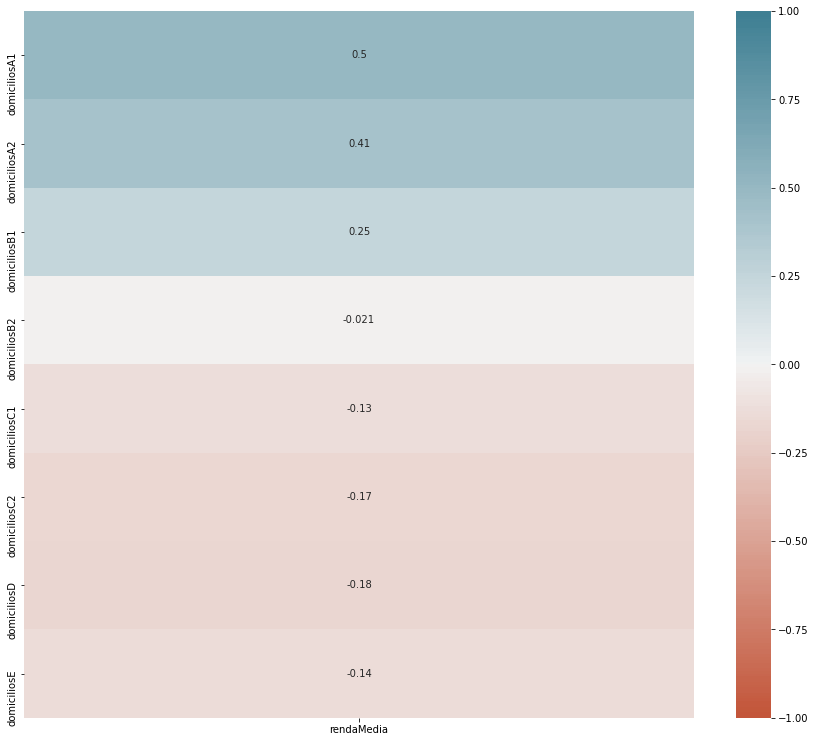

In [ ]:
# plotando coeficientes de correlação em um mapa de calor
# plotando comparação das features de domicílios com rendaMedia

correlacoes = dados.corr()[['rendaMedia']].loc[['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']]

plt.figure(figsize=(15, 13))
sns.heatmap(correlacoes,vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))

O mapa de calor anterior revela 2 coisas:

*   Quanto maior a classe do domicílio maior será a renda média.
*   Quanto menor  a classe do domicílio menor será a renda média.



<AxesSubplot:>

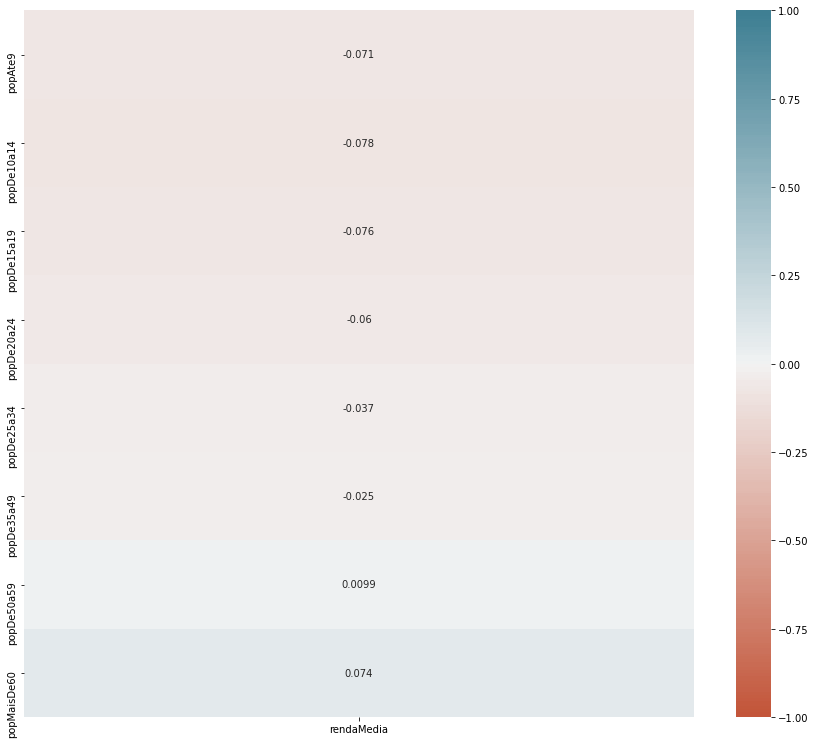

In [ ]:
# plotando coeficientes de correlação em um mapa de calor
# plotando comparação das features de idade com rendaMedia

correlacoes = dados.corr()[['rendaMedia']].loc[['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']]

plt.figure(figsize=(15, 13))
sns.heatmap(correlacoes,vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))

Resultados do gráfico de calor anterior indica que provavelmente não existe uma correlação entre a rendaMedia e as features de idade.

Coeficiente de Correlação: 0.5563354397610217


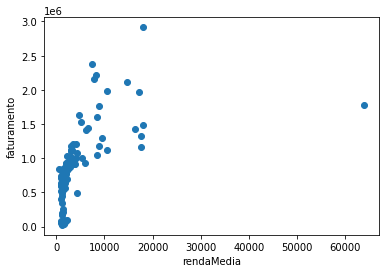

In [ ]:
# plotando correlação entre rendaMedia e faturamento

print(f'Coeficiente de Correlação: {dados.rendaMedia.corr(dados.faturamento)}')
plt.scatter(dados.rendaMedia, dados.faturamento)
plt.xlabel('rendaMedia')
plt.ylabel('faturamento')
plt.show()

Gráfico de dispersão mostra que existe uma correlação positiva moderada entre a renda media e o faturamento. Ou seja, se um aumenta o outro provavelmente também aumenta.

<AxesSubplot:>

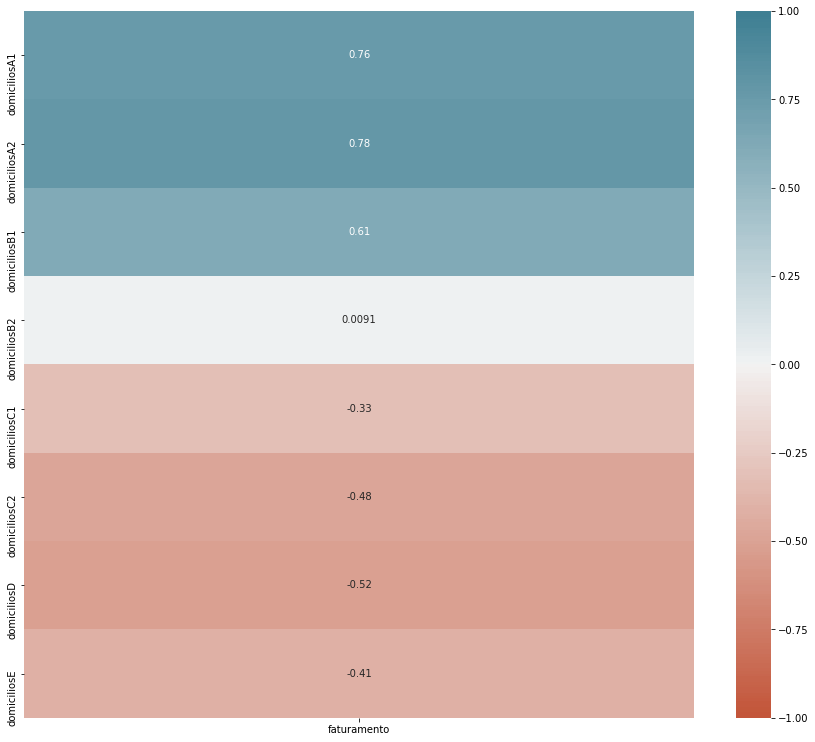

In [ ]:
# plotando coeficientes de correlação em um mapa de calor das features de domicílio e faturmento
# Ele mostra, também, o coeficiente de correlação dentro das células do mapa

correlacoes = dados.corr()[['faturamento']].loc[['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']]
plt.figure(figsize=(15, 13))
sns.heatmap(correlacoes,vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))

Segundo o mapa de calor anterior:

*   Correlação positiva forte para domicílios de classe alta (B1, A2, A1).
    *   Se um aumenta o outro aumenta e se um diminui o outro também diminui.
    *   Característica promissora para modelo de regressão.  
*   Correlação negativa moderada para domicílios de classe mais baixas (C2, D, E).
    *   Se um aumenta o outro diminui e se um diminui o outro aumenta.
    *   Característica promissora para modelo de regressão.  


<AxesSubplot:>

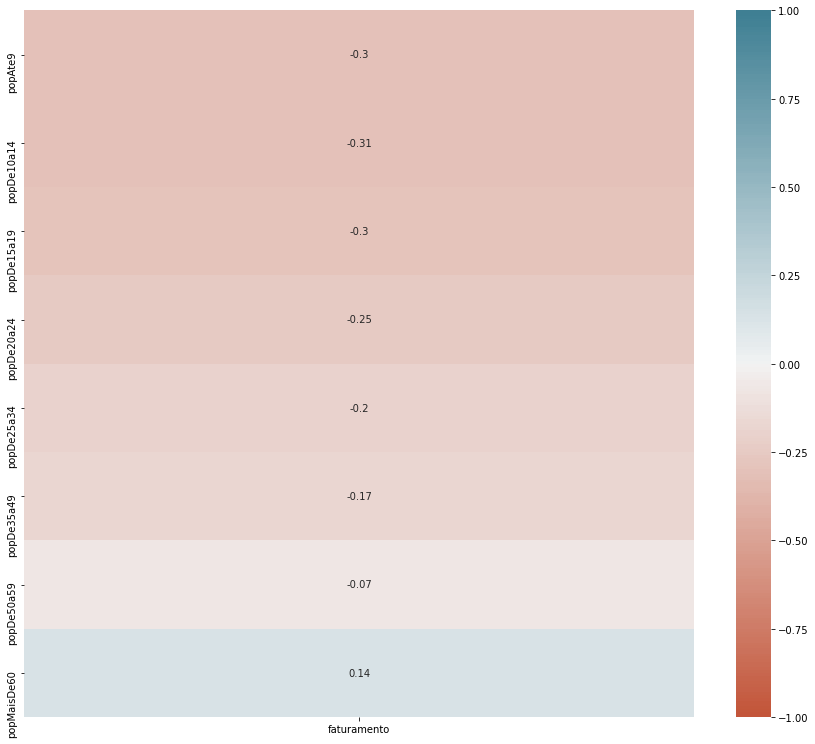

In [ ]:
# plotando coeficientes de correlação em um mapa de calor das features de domicílio e faturmento
# Ele mostra, também, o coeficiente de correlação dentro das células do mapa

correlacoes = dados.corr()[['faturamento']].loc[['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']]
plt.figure(figsize=(15, 13))
sns.heatmap(correlacoes,vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))

Os resultados significantes do mapa de calor anterior indica:



*   Correlação negativa moderada (minimamente) entre a idade de 0 até 19 anos.
    *   Na perspectiva do aumento do faturamento, se as pessoas com essa faixa etária for baixa, o faturamento será alto.

Como o valor das correlações resultantes no gráfico anterior foram baixos, é possível argumentar que o faturamento não seja tão afetado pela idade da população.



### Conclusão geral análise de dados

As features mais promissoras para a construção dos modelos de previsão, segundo as análises, são: 

população, domiciliosA1, domiciliosA2,	domiciliosB1, domiciliosB2, domiciliosC1, domiciliosC2, domiciliosD, domiciliosE e rendaMedia.

As features que caracterizavam a idade da população não tiveram resultados significativos nas análises, portanto, provavelmente o melhor modelo a ser construído será sem esses dados. Provavelmente o público alvo atendido pelo cliente não depende da idade.

Para teste, será feito dois modelos, um com os dados de idade e o outro sem, e os resultados serão comparados.

Obs: Nem todos os dados são úteis para os modelos de aprendizagem. Alguns podem, inclusive, piorar o aprendizado e causar falhas na previsão.

## Organizando dados para modelagem

In [ ]:
# mostrando dados
dados.head()

,codigo,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0


In [ ]:
# removendo features sem importância para treinamento de modelo
dados_modelo = dados.drop(columns=['codigo', 'nome'])
dados_modelo

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,921875.0


In [ ]:
# preparando X
X = dados_modelo.drop(columns=['faturamento'])
X.head()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia
0,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0
1,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0
2,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0
3,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0
4,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0


In [ ]:
# preparando y
y = dados_modelo['faturamento']
y.head()

0    932515.0
1    588833.0
2    874200.0
3    912226.0
4    553020.0
Name: faturamento, dtype: float64

## Criando e testando modelos 

Irei usar 3 modelos que eu vejo como os melhores para o problema de regressão do case.

Os modelos:
*   Árvore de Decisão (Decision Tree)
*   Random Forest
*   Regressão Linear

Esses algoritmos serão usados para a versão de regressão, com a biblioteca scikit-learn.






### Método Holdout

#### Preparando dados

In [ ]:
# separando conjunto de teste e conjunto de treino com a feature de idades (método holdout)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# separando conjunto de testes sem a feature de idades
X_train2 = X_train[['população', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']]
X_test2 = X_test[['população', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']]

#### Treinando e fazendo previsões

In [ ]:
# definindo modelo de regressão linear (com features de idade)
linear1 = LinearRegression()
linear1.fit(X_train,y_train)
pred_linear1 = linear1.predict(X_test)

In [ ]:
# definindo modelo de regressão linear (sem features de idade)
linear2 = LinearRegression()
linear2.fit(X_train2,y_train)
pred_linear2 = linear2.predict(X_test2)

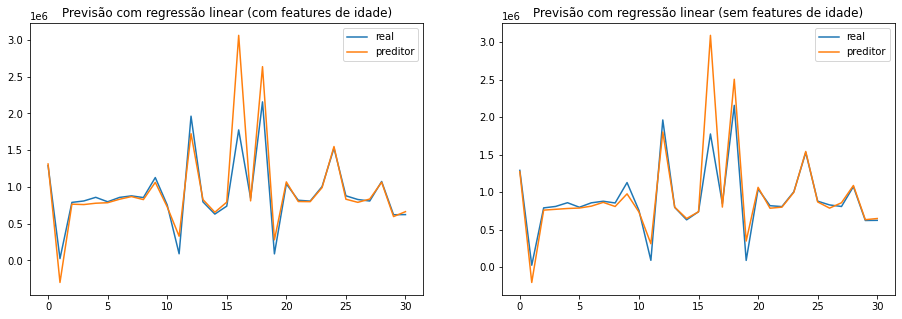

In [ ]:
# plotando resultados da MLP

plt.figure(figsize=(15.5,5)) 

plt.subplot(1, 2, 1)
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear1,label='preditor')
plt.legend()
plt.title('Previsão com regressão linear (com features de idade)')

plt.subplot(1, 2, 2)
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear2,label='preditor')
plt.legend()
plt.title('Previsão com regressão linear (sem features de idade)')

plt.show()

In [ ]:
# definindo modelo de árvore de decisão (com features de idade)
arvore1 = DecisionTreeRegressor()
arvore1.fit(X_train,y_train)
pred_arvore1 = arvore1.predict(X_test)

In [ ]:
# definindo modelo de árvore de decisão (sem features de idade)
arvore2 = DecisionTreeRegressor()
arvore2.fit(X_train2,y_train)
pred_arvore2 = arvore2.predict(X_test2)

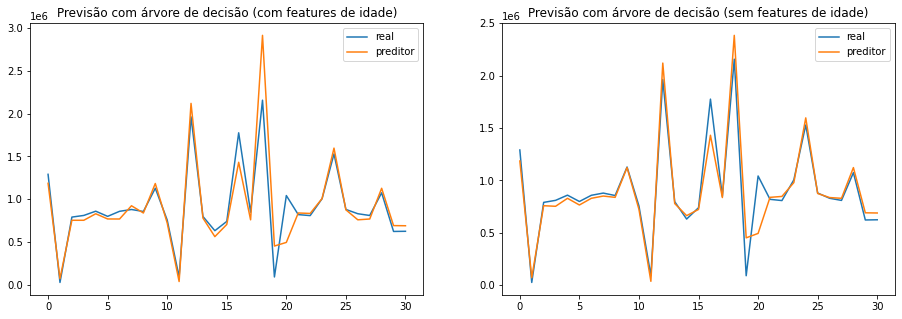

In [ ]:
# plotando resultados da árvore de decisão

plt.figure(figsize=(15.5,5)) 


plt.subplot(1, 2, 1) 
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore1,label='preditor')
plt.legend()
plt.title('Previsão com árvore de decisão (com features de idade)')


plt.subplot(1, 2, 2) 
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore2,label='preditor')
plt.legend()
plt.title('Previsão com árvore de decisão (sem features de idade)')

plt.show()

In [ ]:
# definindo modelo de random forest (com features de idade)
floresta1 = RandomForestRegressor(n_estimators=150)
floresta1.fit(X_train,y_train)
pred_floresta1 = floresta1.predict(X_test)

In [ ]:
# definindo modelo de random forest (sem features de idade)
floresta2 = RandomForestRegressor(n_estimators=150)
floresta2.fit(X_train2,y_train)
pred_floresta2 = floresta2.predict(X_test2)

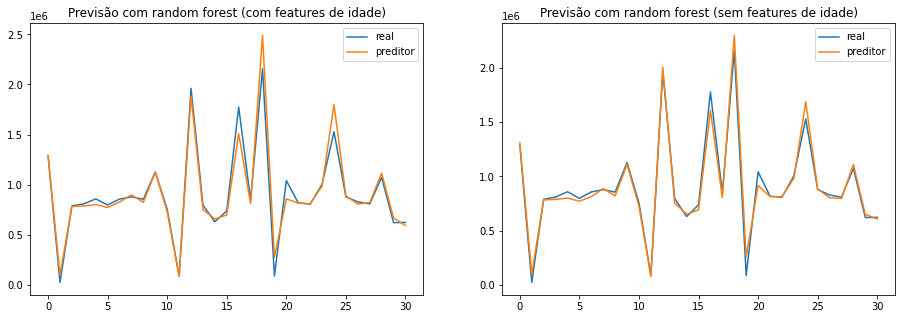

In [ ]:
# plotando resultados da random forest

plt.figure(figsize=(15.5,5)) 


plt.subplot(1, 2, 1) 
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta1,label='preditor')
plt.legend()
plt.title('Previsão com random forest (com features de idade)')


plt.subplot(1, 2, 2) 
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta2,label='preditor')
plt.legend()
plt.title('Previsão com random forest (sem features de idade)')

plt.show()

#### Testando modelos

Os testes usados nos modelos são:



*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)

O resultado desses testes podem ser interpretado como: quanto mais próximo de 0 é o valor, melhor.



##### Mean Absolute Error (MAE)


In [ ]:
# MAE Linear
mael1, mael2 = mean_absolute_error(y_test,pred_linear1), mean_absolute_error(y_test,pred_linear2)

In [ ]:
# MAE Árvore
maea1, maea2 = mean_absolute_error(y_test,pred_arvore1), mean_absolute_error(y_test,pred_arvore2)

In [ ]:
# Mae Random Forest
maer1, maer2 = mean_absolute_error(y_test,pred_floresta1), mean_absolute_error(y_test,pred_floresta2)

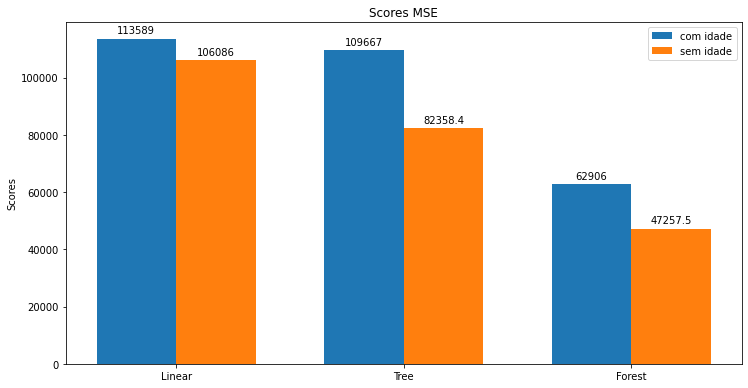

In [ ]:
#  para instalar nova versão do pyplot no colab e usar bar_label
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 


labels = ['Linear', 'Tree', 'Forest']
mae_com_idade = [mael1, maea1, maer1]
mae_sem_idade = [mael2, maea2, maer2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, mae_com_idade, width, label='com idade')
rects2 = ax.bar(x + width/2, mae_sem_idade, width, label='sem idade')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores MSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

##### Mean Squared Error (MSE)


In [ ]:
# MSE linear
msel1, msel2 = mean_squared_error(y_test,pred_linear1), mean_squared_error(y_test,pred_linear2)

In [ ]:
# MSE arvore
msea1, msea2 = mean_squared_error(y_test,pred_arvore1), mean_squared_error(y_test,pred_arvore2)

In [ ]:
# MSE random forest
mser1, mser2 = mean_squared_error(y_test,pred_floresta1), mean_squared_error(y_test,pred_floresta2)

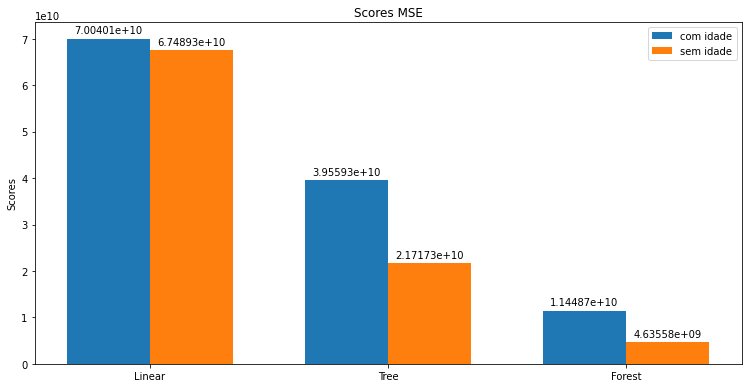

In [ ]:
#  para instalar nova versão do pyplot no colab e usar bar_label
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 


labels = ['Linear', 'Tree', 'Forest']
mse_com_idade = [msel1, msea1, mser1]
mse_sem_idade = [msel2, msea2, mser2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, mse_com_idade, width, label='com idade')
rects2 = ax.bar(x + width/2, mse_sem_idade, width, label='sem idade')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores MSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

##### Root Mean Squared Error (RMSE)

In [ ]:
# RMSE para regressão linear
rmsel1, rmsel2 = mean_squared_error(y_test,pred_linear1)**(1/2),  mean_squared_error(y_test,pred_linear2)**(1/2)

In [ ]:
# RMSE para árvore de decisão
rmsea1, rmsea2 = mean_squared_error(y_test,pred_arvore1)**(1/2), mean_squared_error(y_test,pred_arvore2)**(1/2),

In [ ]:
# RMSE para random forest
rmser1, rmser2 = mean_squared_error(y_test,pred_floresta1)**(1/2),  mean_squared_error(y_test,pred_floresta2)**(1/2),

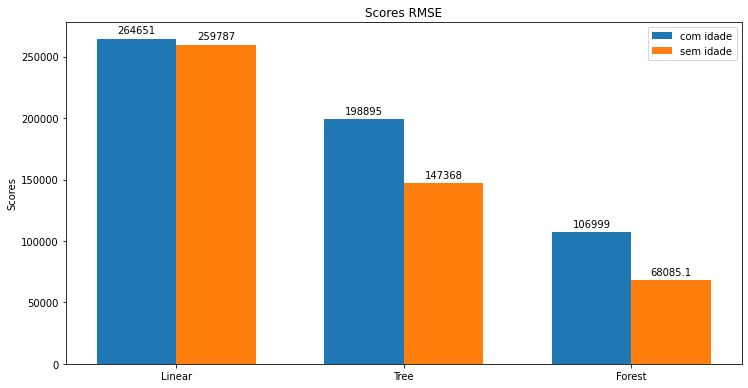

In [ ]:
#  para instalar nova versão do pyplot no colab e usar bar_label
# !pip install matplotlib==3.4.2 

import matplotlib.pyplot as plt 


labels = ['Linear', 'Tree', 'Forest']
rmse_com_idade = [rmsel1, rmsea1, rmser1]
rmse_sem_idade = [rmsel2, rmsea2, rmser2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10.5,5.5))
rects1 = ax.bar(x - width/2, rmse_com_idade, width, label='com idade')
rects2 = ax.bar(x + width/2, rmse_sem_idade, width, label='sem idade')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

#### Conclusões Holdout



*   A hipótese de que as features de idade poderiam atrapalhar os resultados do previsor ganhou mais força. Pelos testes feitos, todos os modelos treinados sem as features de idade tiveram resultados melhores.
*   No método holdout, o modelo mais promissor foi o de Randon Forest, trazendo resultados melhores nos dois testes, com features de idade e sem features de idade, comparados aos outros dois modelos testados, Árvore de Decisão e Regressão Linear.
*   Apesar dos modelos terem bons resultados para os dados mais "estáveis", não conseguiram prever eficientemente os outliers, tanto pra cima quanto pra baixo, segundo os gráficos de resultados da previsões plotados na parte "Treinando e fazendo previsõe".
*   Nos testes feitos, os resultados apresentaram certa variabilidade no método holdout, resultados de testes variando. Para ultrapassar esse problema, será feito testes no método Cross Validation que evita viés na seleção e separação dos dados. 


### Método de Cross Validation (Validação Cruzada)


O método de Cross Validation é necessário para evitar coisas como viés causado pela seleção de dados aleatórias com o método holdout. Por exemplo, se ao dividir os dados de X_train e y_train, os dados selecionados possuírem uma grande quantidade de dados com certa característica enquanto o X_test e y_teste não, esses dados serão mais valorizados na parte do treinamento e causarão um resultado ruim na parte dos testes. Dividindo o dataframe em várias partes e usando para treino e teste, esse tipo de cenário é evitado.

#### Preparando dados

In [ ]:
# ṕreparando X2 sem as features de idade
X2 = X[['população', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']]
X2.head()

,população,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia
0,11676,0,145,715,1242,1093,758,92,304,2501.0
1,27564,0,0,82,506,2040,2490,827,2506,931.0
2,9003,0,96,404,652,644,522,77,254,2391.0
3,9606,114,178,393,517,945,584,137,286,3727.0
4,57222,0,0,1089,2821,5110,5422,1073,3261,1380.0


#### Testando com validação cruzada

Interpretação: Quanto mais próximo de 0, melhor os modelos serão.

O modelo de teste usado para o cross validation será Mean Absolute Error (MAE)

In [ ]:
# preparando 5 folds para validação cruzada com regressão linear

linear1 = LinearRegression()
linear2 = LinearRegression()

mae_linear1 = cross_val_score(linear1, X, y, scoring="neg_mean_absolute_error", cv=5)
mae_linear2 = cross_val_score(linear2, X2, y, scoring="neg_mean_absolute_error",cv=5)

print("Média MAE Regressão Linear (sem features de idade): {}".format(mae_linear1.mean()))
print("Média MAE Regressão Linear (com features de idade): {}".format(mae_linear2.mean()))

Média MAE Regressão Linear (sem features de idade): -148635.65114839186
Média MAE Regressão Linear (com features de idade): -109323.15687858881


In [ ]:
# preparando 5 folds para validação cruzada com árvore de decisão

arvore1 = DecisionTreeRegressor()
arvore2 = DecisionTreeRegressor()

mae_arvore1 = cross_val_score(arvore1, X, y, scoring="neg_mean_absolute_error", cv=5)
mae_arvore2= cross_val_score(arvore2, X2, y, scoring="neg_mean_absolute_error",cv=5)

print("Média MAE Árvore de Decisão (sem features de idade): {}".format(mae_arvore1.mean()))
print("Média MAE Árvore de Decisão (com features de idade): {}".format(mae_arvore2.mean()))

Média MAE Árvore de Decisão (sem features de idade): -100852.50967741935
Média MAE Árvore de Decisão (com features de idade): -97116.0630107527


In [ ]:
#preparando 5 folds para validação cruzada com random forest

floresta1 = RandomForestRegressor()
floresta2 = RandomForestRegressor()

mae_floresta1 = cross_val_score(floresta1, X, y, scoring="neg_mean_absolute_error", cv=5)
mae_floresta2= cross_val_score(floresta2, X2, y, scoring="neg_mean_absolute_error",cv=5)

print("Média MAE Random Forest (sem features de idade): {}".format(mae_floresta1.mean()))
print("Média MAE Random Forest (com features de idade): {}".format(mae_floresta2.mean()))

Média MAE Random Forest (sem features de idade): -74185.01669462366
Média MAE Random Forest (com features de idade): -70907.44359354839


#### Conclusões Cross Validation

Com o Cross Validation foi possível obter a confirmação de conclusões feitas com o método holdout.


*   Como no método holdout, os modelos treinados sem as features de idade tiveram melhores resultados.
*   Como no método holdout, o modelo mais promissor foi o de Random Forest.





## Conclusões Gerais

*   O melhor algoritmo de Machine Learning para previsão da feature faturamento é o Random Forest (para regressão).
   *   Os resultados possuem variações que poderiam ser reduzidas com mais features significativas sobre os bairros.
      *   Features que caracterizassem, por exemplo, os outliers que aparecem com certa frequência nos dados (rendaMEdia, faturamento, domicíliosA1, etc).
   *  Se os outliers fossem removidos, os modelos teriam um resultado ainda melhor estatisticamente. Porém, isso seria apenas vizualmente, pois os modelos ainda não iriam prever eficientemente instâncias com outliers como os que foram mostrados.
*   As features de idade da população podem piorar a previsão do faturanento com os algoritmos de Machine Learning testados.
*   Apesar das observações citadas anteriormente, o algoritmo Random Forest, alimentado com os dados das features pessoas, domiciliosA1, domiciliosA2, domiciliosB1, domiciliosB2, domiciliosC1, domiciliosC2, domiciliosD, domiciliosE, rendaMedia e faturamento, poderia ser aplicado para a previsão do faturamento em novos bairros.


